In [21]:
    from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#21 4HFI
%matplotlib inline

In [22]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70
16. 4HFI_pH70
17. 4NPQ_F238LI233T_pH46
18. 4NPQ_F238L_pH46
19. 4NPQ_pH46
20. 4NPQ_I233T_pH46

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n16. 4HFI_pH70\n17. 4NPQ_F238LI233T_pH46\n18. 4NPQ_F238L_pH46\n19. 4NPQ_pH46\n20. 4NPQ_I233T_pH46\n\n'

In [23]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3',
              '5NJY_F238L_pH46_md1','5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1',
              '4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5',
              '4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1',
              '4NPQ_F238LI233T_pH46_md1','4NPQ_F238L_pH46_md1',
              '4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [118]:
md_data = pd.read_csv("glic_gating.csv")
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'MD_name', 'pH', 'replicate', 'traj_time', 'system', 'rmsd',
       'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1', 'domain twist',
       'ecd_pc2', 'tmd_pc2', 'hydration_data', 'hydration_data_235_3a',
       'hydration_data_233_3a', 'hydration_data_238_3a',
       'hydration_data_226_3a', 'hydration_data_240_3a', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'beta_expansion', 'M2_radius', 'ECD_radius',
       'M2_M1_distance', 'M1_kink', 'Hbond_235_259', 'Hbond_200_239',
       'Hbond_200_243', 'hydration_data_m123', 'hbond_water_200_239',
       'hbond_water_200_243', 'water_bridge_200_243', 'water_bridge_200_239',
       'hbond(235, 259)', 'hbond(239, 200)', 'hbond(243, 200)',
       'hbond_200_239', 'hbond_200_243', 'hydration_data_intra',
       'hydration_da

In [19]:
#Normalization
md_data_feature = md_data[['wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink','Hbond_235_259']]
md_data_feature = (md_data_feature - md_data_feature.min()) / (md_data_feature.max() - md_data_feature.min())
md_norm = md_data
md_norm[md_data_feature.columns] = md_data_feature
md_data = pd.read_csv("glic_gating.csv")

In [119]:
md_data = md_data[md_data.cluster_index == 3]

In [106]:
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]

In [107]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

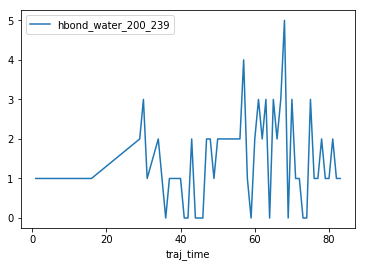

In [66]:
ax = plt.subplot()
md_data[(md_data['system'] == 12) & (md_data['replicate'] == 5)].plot(x='traj_time',y='hbond_water_200_239',ax=ax)
plt.show()

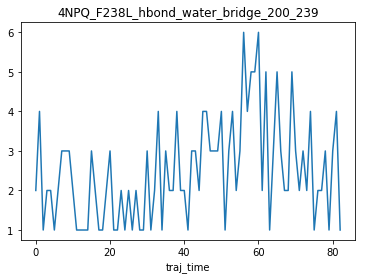

In [111]:
ax = plt.subplot()
md_data[(md_data['system'] == 13) & (md_data['replicate'] == 3)].plot(x='traj_time',y='hbond_water_200_239',ax=ax,legend=None)
ax.set_title('4NPQ_F238L_hbond_water_bridge_200_239')
plt.show()

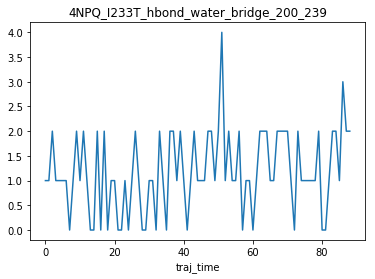

In [112]:
ax = plt.subplot()
md_data[(md_data['system'] == 14) & (md_data['replicate'] == 3)].plot(x='traj_time',y='hbond_water_200_239',ax=ax,legend=None)
ax.set_title('4NPQ_I233T_hbond_water_bridge_200_239')
plt.show()

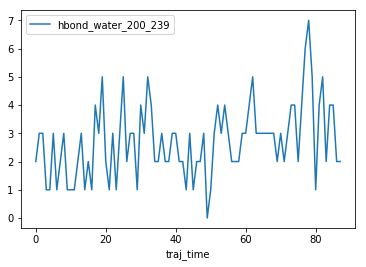

In [113]:
ax = plt.subplot()
md_data[(md_data['system'] == 15) & (md_data['replicate'] == 3)].plot(x='traj_time',y='hbond_water_200_239',ax=ax)
plt.show()


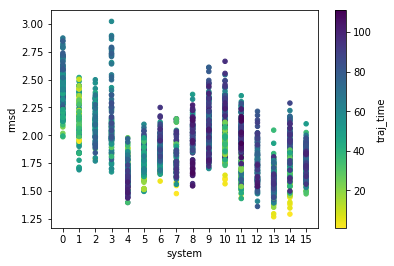

In [108]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='rmsd',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,16)))
plt.show()

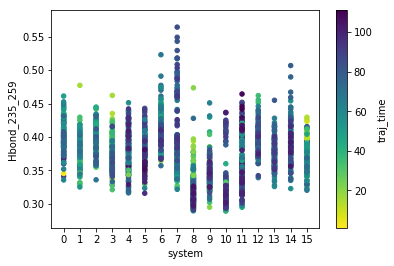

In [68]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='Hbond_235_259',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,16)))
plt.show()

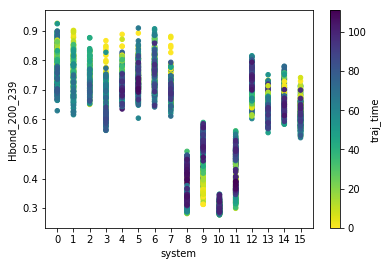

In [36]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='Hbond_200_239',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,16)))
plt.show()

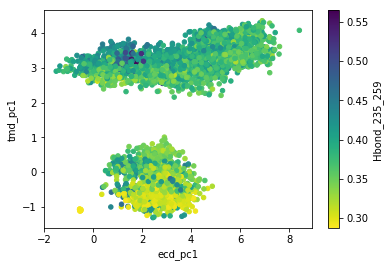

In [25]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='Hbond_235_259',ax=ax,colormap='viridis_r')

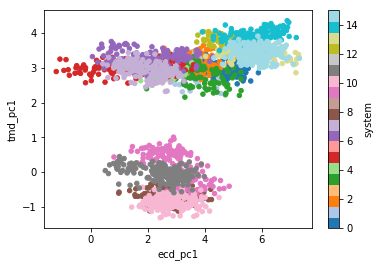

In [69]:
fig, ax = plt.subplots()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

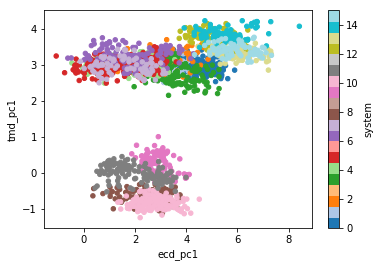

In [117]:
fig, ax = plt.subplots()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

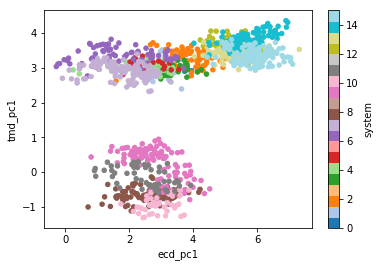

In [120]:
fig, ax = plt.subplots()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

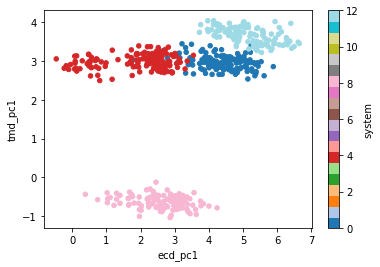

In [110]:
fig, ax = plt.subplots()
md_WT.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

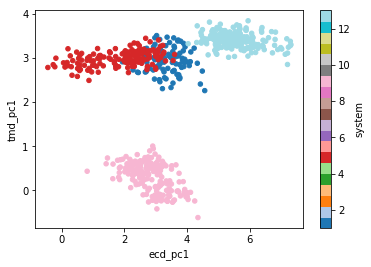

In [111]:
fig, ax = plt.subplots()
md_F238L.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

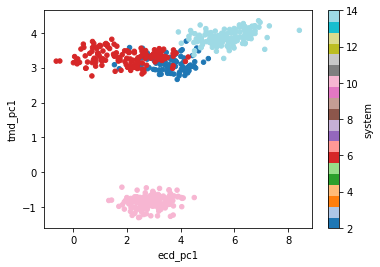

In [112]:
fig, ax = plt.subplots()
md_I233T.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

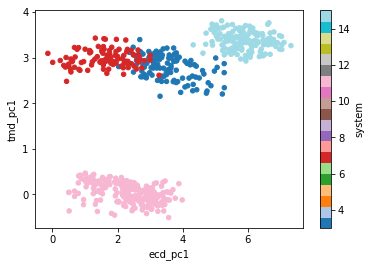

In [113]:
fig, ax = plt.subplots()
md_F238LI233T.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

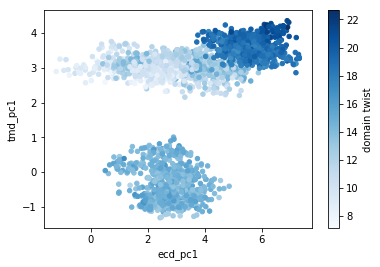

In [78]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='domain twist',ax=ax,colormap='Blues')

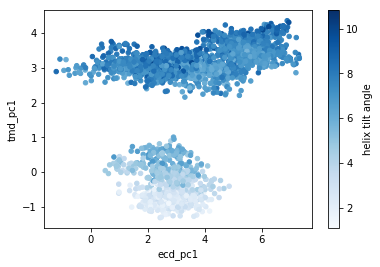

In [79]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='helix tilt angle',ax=ax,colormap='Blues')

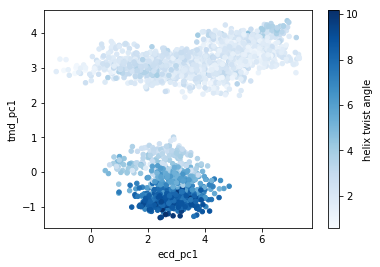

In [80]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='helix twist angle',ax=ax,colormap='Blues')

In [17]:
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MD_name', 'pH', 'replicate', 'traj_time',
       'system', 'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink', 'Hbond_235_259', 'Hbond_200_239', 'Hbond_200_243',
       'hydration_data_m123', 'hbond_water_200_239', 'hbond_water_200_243',
       'water_bridge_200_243', 'water_bridge_200_239', 'hbond(235, 259)',
       'hbond(239, 200)', 'hbond(243, 200)', 'hbond_200_239', 'hbond_200_243',
       'hydration_data_intra', 'hydration_data_inter', 'hbond_235_239',
       'hbond_235

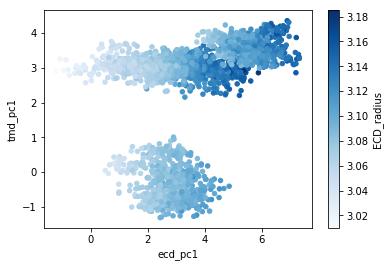

In [81]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='ECD_radius',ax=ax,colormap='Blues')

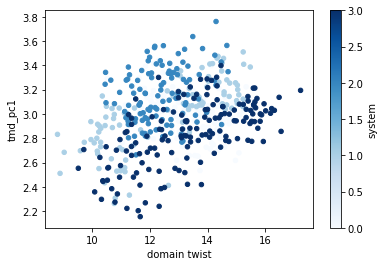

In [82]:
# 5NJY_pH70
ax = plt.subplot()
md_5NJY_pH70.plot(kind="scatter",x="domain twist",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

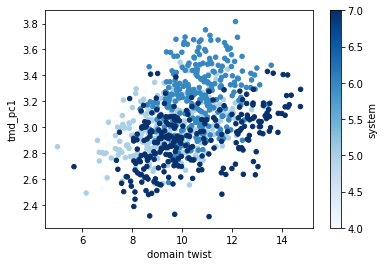

In [30]:
# 5NJY_pH46
ax = plt.subplot()
md_5NJY_pH46.plot(kind="scatter",x="domain twist",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

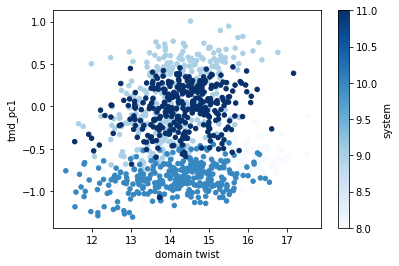

In [31]:
# 4HFI_pH46
ax = plt.subplot()
md_4HFI_pH46.plot(kind="scatter",x="domain twist",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

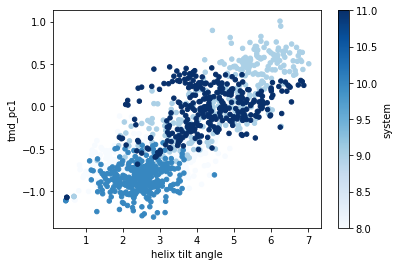

In [32]:
# 4HFI_pH46
ax = plt.subplot()
md_4HFI_pH46.plot(kind="scatter",x="helix tilt angle",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

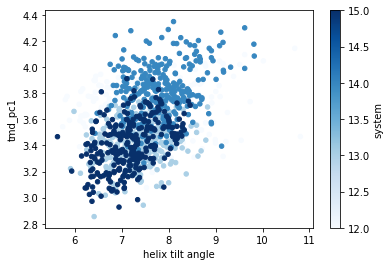

In [33]:
# 4NPQ_pH70
ax = plt.subplot()
md_4NPQ_pH70.plot(kind="scatter",x="helix tilt angle",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

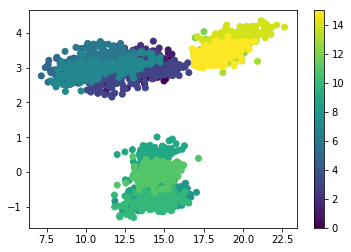

In [83]:
ax = plt.scatter(md_data['domain twist'],md_data['tmd_pc1'],c=md_data['system'])
cbar = plt.colorbar()

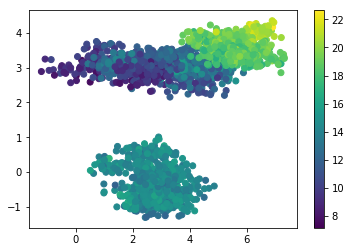

In [84]:
ax = plt.scatter(md_data['ecd_pc1'],md_data['tmd_pc1'],c=md_data['domain twist'])
cbar = plt.colorbar()

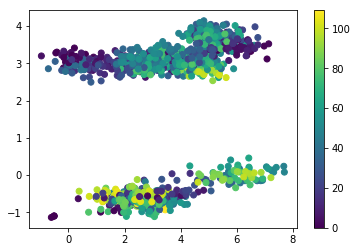

In [36]:
#WT
ax = plt.scatter(md_WT['ecd_pc1'],md_WT['tmd_pc1'],c=md_WT['traj_time'])
cbar = plt.colorbar()

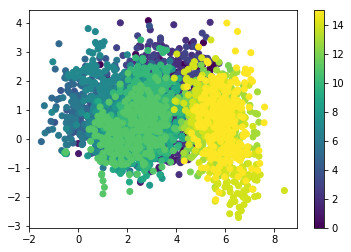

In [47]:
#F238L
ax = plt.scatter(md_data['ecd_pc1'],md_data['ecd_pc2'],c=md_data['system'])
cbar = plt.colorbar()

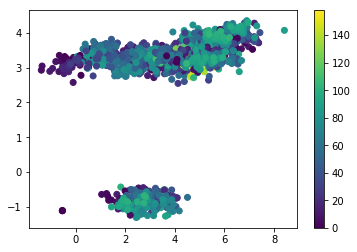

In [38]:
#I233T
ax = plt.scatter(md_I233T['ecd_pc1'],md_I233T['tmd_pc1'],c=md_I233T['traj_time'])
cbar = plt.colorbar()

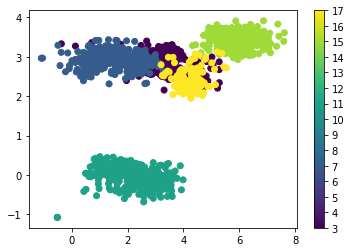

In [74]:
#F238LI233T
ax = plt.scatter(md_F238LI233T['ecd_pc1'],md_F238LI233T['tmd_pc1'],c=md_F238LI233T['system'])
cbar = plt.colorbar()


In [105]:
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MD_name', 'pH', 'replicate', 'traj_time',
       'system', 'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink', 'Hbond_235_259', 'Hbond_200_239', 'Hbond_200_243',
       'hydration_data_m123', 'hbond_water_200_239', 'hbond_water_200_243',
       'water_bridge_200_243'],
      dtype='object')

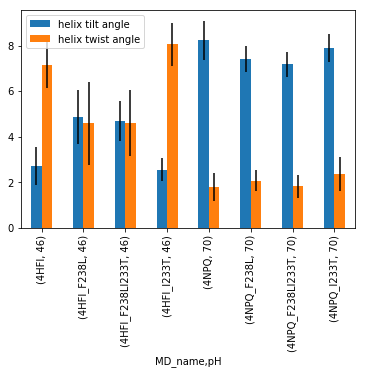

In [85]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['helix tilt angle','helix twist angle']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

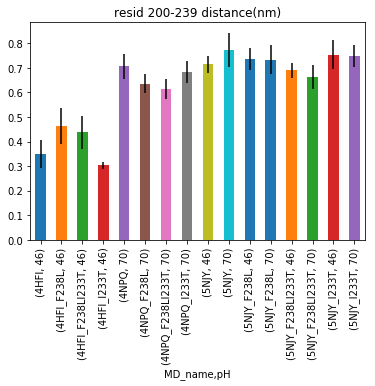

In [87]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['Hbond_200_239']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('resid 200-239 distance(nm)')

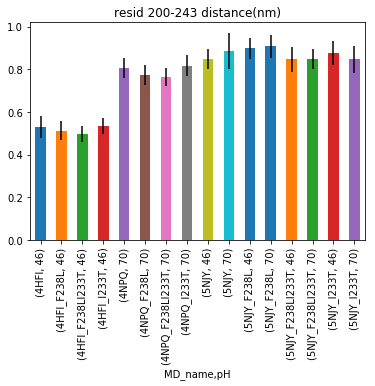

In [88]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['Hbond_200_243']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('resid 200-243 distance(nm)')

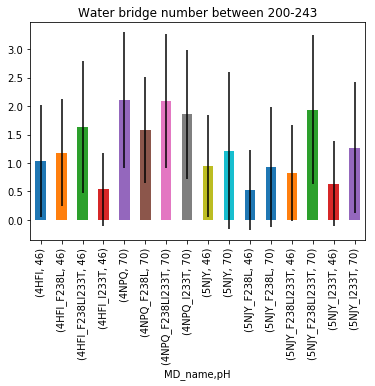

In [89]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_water_200_243']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Water bridge number between 200-243')

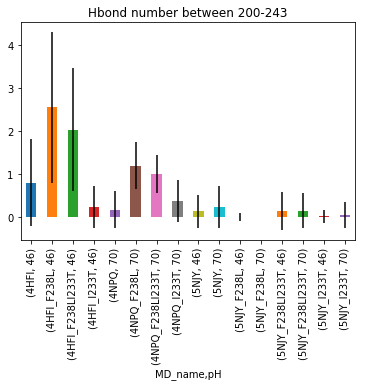

In [90]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_200_243']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Hbond number between 200-243')

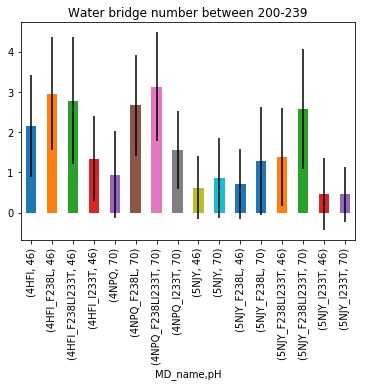

In [91]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_water_200_239']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Water bridge number between 200-239')

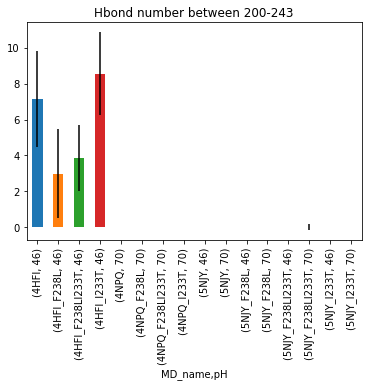

In [92]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_200_239']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Hbond number between 200-243')

In [93]:
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'MD_name', 'pH',
       'replicate', 'traj_time', 'system', 'rmsd', 'wholepca_pc1',
       'wholepca_pc2', 'ecd_pc1', 'tmd_pc1', 'domain twist', 'ecd_pc2',
       'tmd_pc2', 'hydration_data', 'hydration_data_235_3a',
       'hydration_data_233_3a', 'hydration_data_238_3a',
       'hydration_data_226_3a', 'hydration_data_240_3a', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'beta_expansion', 'M2_radius', 'ECD_radius',
       'M2_M1_distance', 'M1_kink', 'Hbond_235_259', 'Hbond_200_239',
       'Hbond_200_243', 'hydration_data_m123', 'hbond_water_200_239',
       'hbond_water_200_243', 'water_bridge_200_243', 'water_bridge_200_239',
       'hbond(235, 259)', 'hbond(239, 200)', 'hbond(243, 200)',
       'hbond_200_239', 'hbond_200_243', 'hydration_data_intra',
       'hydration_data_inter', 'hbond_23

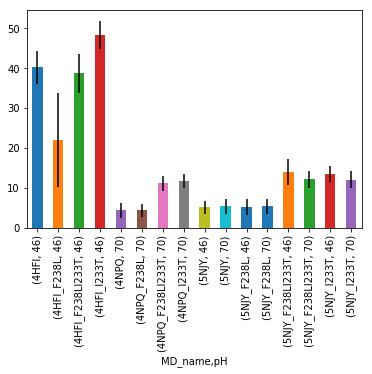

In [94]:
group = md_data.groupby(['MD_name','pH'])['hydration_data']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

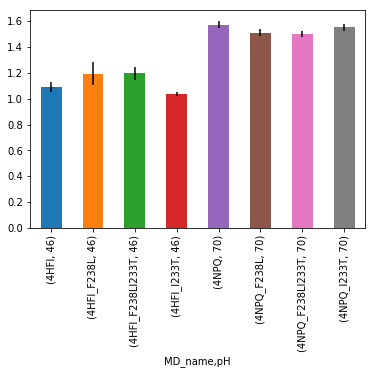

In [95]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['M2_M1_distance']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

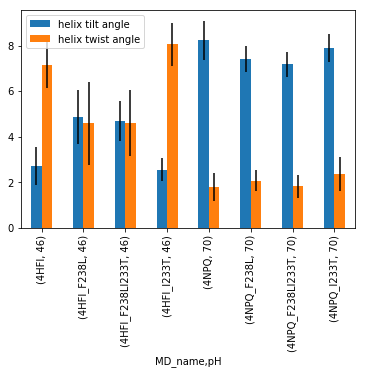

In [96]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['helix tilt angle','helix twist angle']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

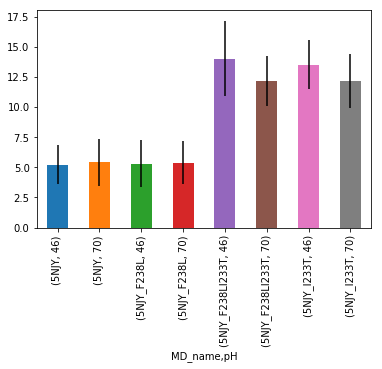

In [97]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 7)].groupby(['MD_name','pH'])['hydration_data']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


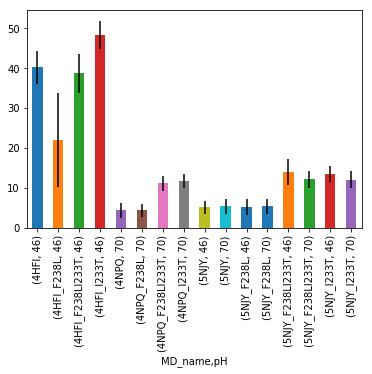

In [98]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hydration_data']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


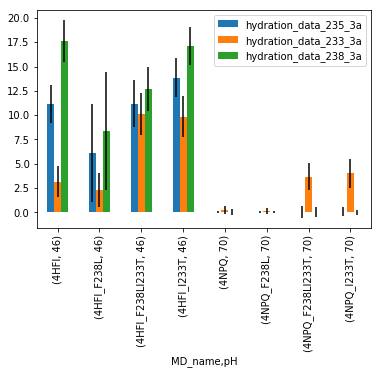

In [99]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hydration_data_235_3a',
       'hydration_data_233_3a','hydration_data_238_3a']
mean = group.mean()

errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.savefig('hydration.png')

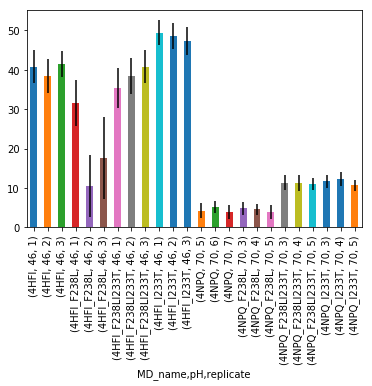

In [100]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH','replicate'])['hydration_data']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


In [14]:
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MD_name', 'pH', 'replicate', 'traj_time',
       'system', 'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink', 'Hbond_235_259', 'Hbond_200_239', 'Hbond_200_243',
       'hydration_data_m123', 'hbond_water_200_239', 'hbond_water_200_243',
       'water_bridge_200_243', 'water_bridge_200_239', 'hbond(235, 259)',
       'hbond(239, 200)', 'hbond(243, 200)', 'hbond_200_239', 'hbond_200_243',
       'hydration_data_intra', 'hydration_data_inter', 'hbond_235_239',
       'hbond_235

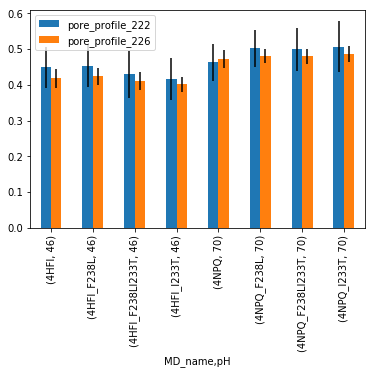

In [15]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['pore_profile_222','pore_profile_226']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


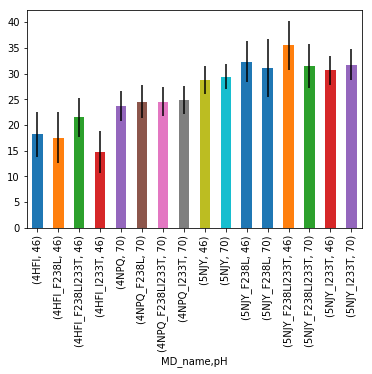

In [101]:
group = md_data.groupby(['MD_name','pH'])['hydration_data_m123']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


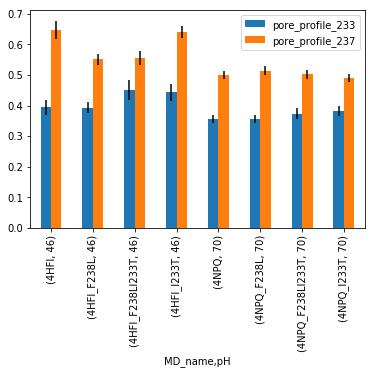

In [102]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['pore_profile_233','pore_profile_237']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


In [103]:
group = md_norm[(md_norm['system'] >=8) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['helix tilt angle','helix twist angle']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


NameError: name 'md_norm' is not defined

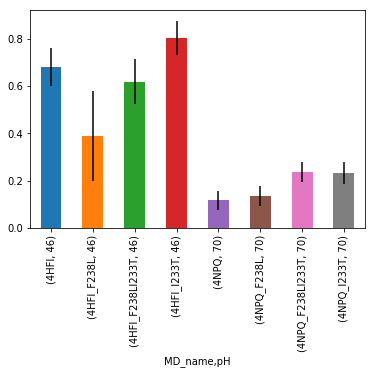

In [8]:
group = md_norm[(md_norm['system'] >=8) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['hydration_data']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

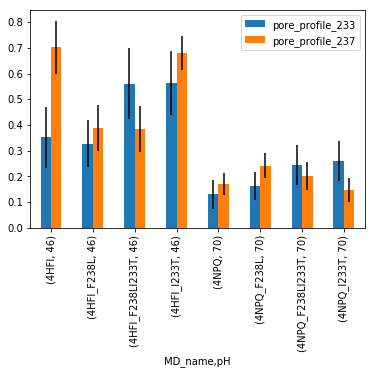

In [14]:
group = md_norm[(md_norm['system'] >=8) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['pore_profile_233','pore_profile_237']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


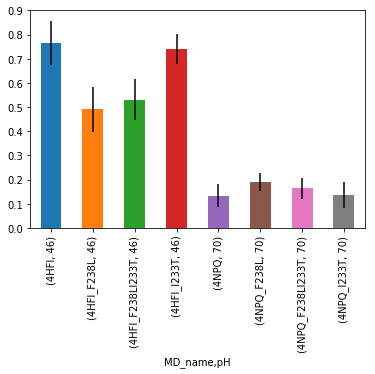

In [15]:
group = md_norm[(md_norm['system'] >=8) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['M2_radius']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


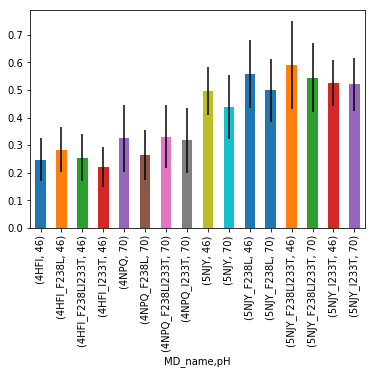

In [12]:
group = md_norm[(md_norm['system'] >=0) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['M1_kink']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)


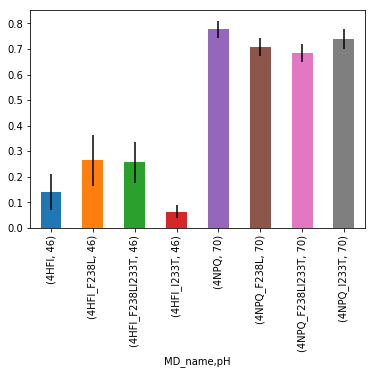

In [44]:
group = md_norm[(md_norm['system'] >=8) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['M2_M1_distance']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

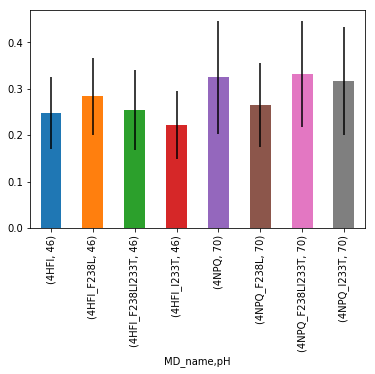

In [50]:
group = md_norm[(md_norm['system'] >=8) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['M1_kink']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

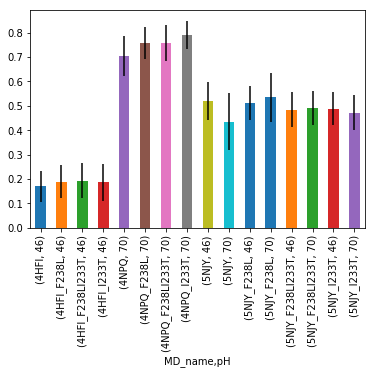

In [14]:
group = md_norm[(md_norm['system'] >=0) & (md_norm['system'] <= 15)].groupby(['MD_name','pH'])['beta_expansion']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

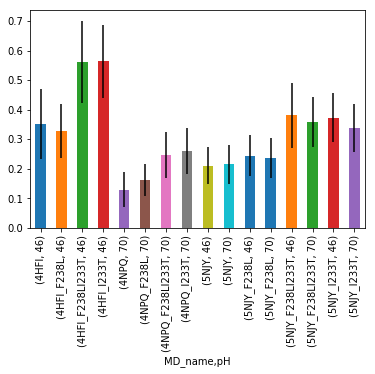

In [17]:
group = md_norm[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['pore_profile_233']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

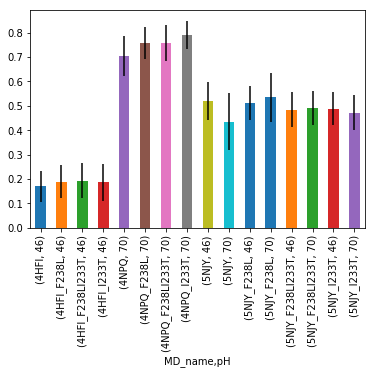

In [15]:
group = md_norm[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['beta_expansion']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

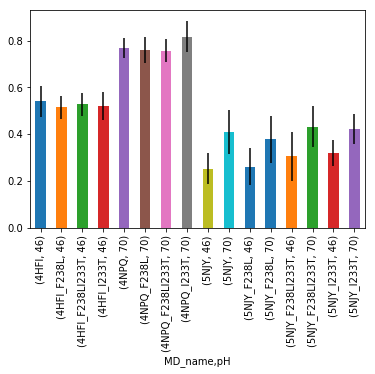

In [19]:
group = md_norm[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['domain twist']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)

In [38]:
md_norm.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'MD_name', 'pH',
       'replicate', 'traj_time', 'system', 'rmsd', 'wholepca_pc1',
       'wholepca_pc2', 'ecd_pc1', 'tmd_pc1', 'domain twist', 'ecd_pc2',
       'tmd_pc2', 'pore_profile_222', 'pore_profile_226', 'pore_profile_230',
       'pore_profile_233', 'pore_profile_237', 'pore_profile_240',
       'helix tilt angle', 'helix twist angle', 'hydration_data',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink', 'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a', 'hydration_data_10a',
       'hydration_data_240_3a'],
      dtype='object')